In [3]:
using CairoMakie

# 1D problem
Consider a function $q(t)$ satisfied with the following differential equation:
$$
q_{,tt} = \frac{f(t)}{m}
$$

The solution of this equation can be obtained by specificing the initial value of $q$:
$$
q = \frac{\int f dt}{2m} + \dot q_0 t + q_0
$$

where $f$, $m$, $\dot q_0$, $q_0$ are the constants.

In [7]:
m = 1;
c₀ = 3;
c₁ = 2;
f(t) = t;
ḟ(t) = 1;

q₀(t) = t^3/6;
q̇₀(t) = t^2/2;

q₁(t) = t^3/6 + c₁*t;
q̇₁(t) = t^2/2 + c₁;

q₂(t) = t^3/6 + c₁*t + c₀;
q̇₂(t) = t^2/2 + c₁;

## Lagrangian
$$
L(q, \dot q, t) = \frac{1}{2} m \dot q^2 + fq
$$

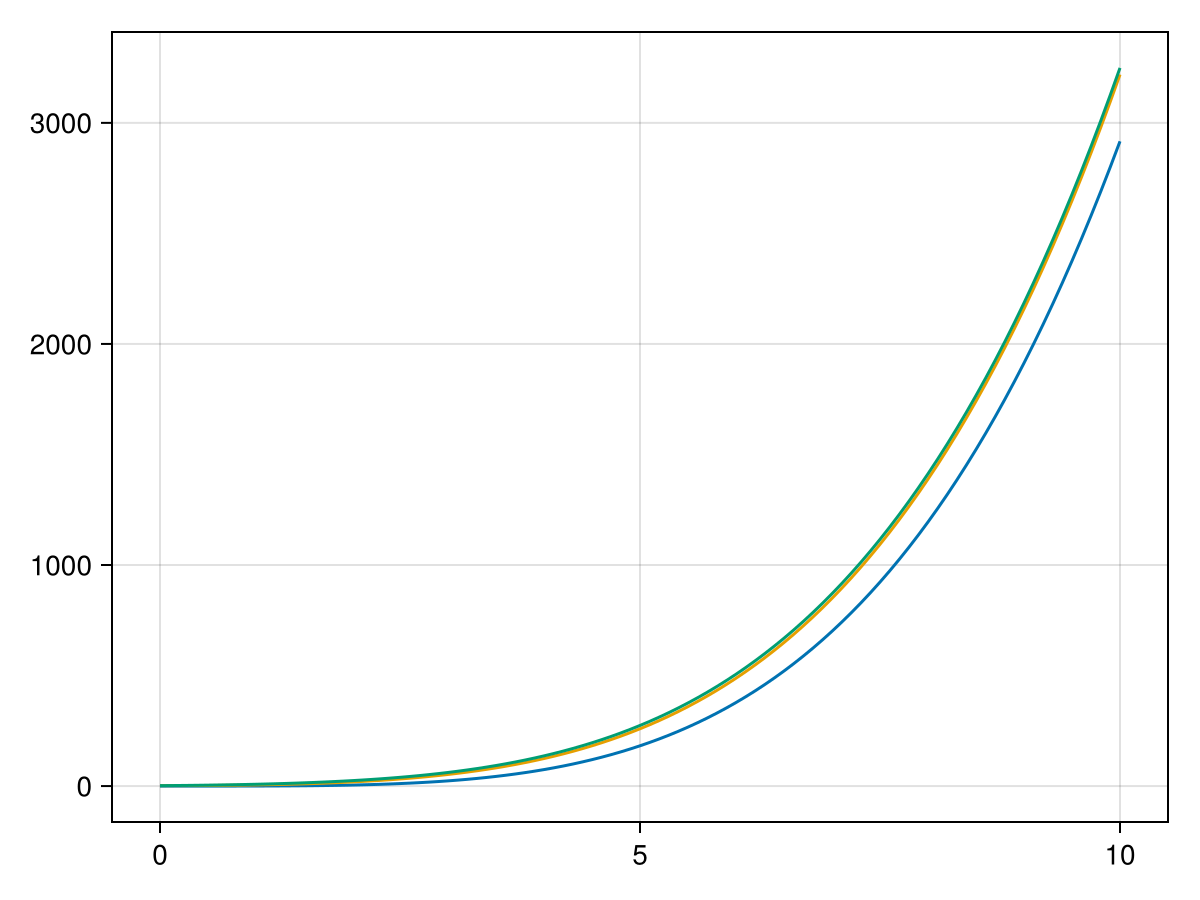

In [8]:
L(q,q̇,t) = 0.5*m*q̇(t)^2 + f(t)*q(t)
dt = 0.1
t = 0:dt:10
fig1 = Figure()
ax1 = Axis(fig1[1,1])
lines!(ax1,t,[L(q₀,q̇₀,t_) for t_ in t])
lines!(ax1,t,[L(q₁,q̇₁,t_) for t_ in t])
lines!(ax1,t,[L(q₂,q̇₂,t_) for t_ in t])
fig1

## Hamilitonian
Let $p = \frac{\partial L}{\partial \dot q}$,
$$
H(p,q,t) = p \dot q - L(q,\dot q, t)
$$

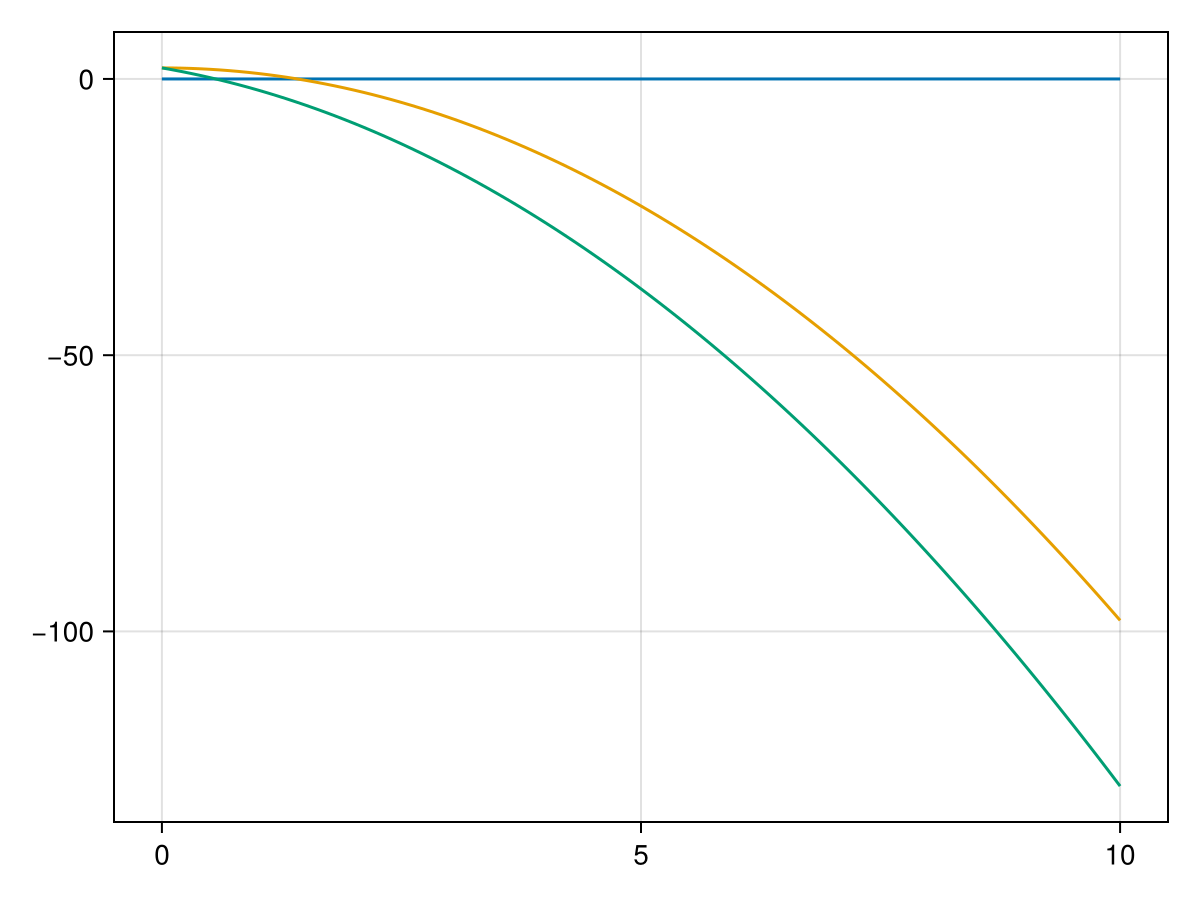

In [30]:
p(q̇,t) = m*q̇(t)
H(q,q̇,t) = p(q̇,t)*q̇(t) - L(q,q̇,t)
fig2 = Figure()
ax2 = Axis(fig2[1,1])
lines!(ax2,t,[H(q₀,q̇₀,t_) + q₀(t_)*f(t_) - t_^4/8 for t_ in t])
lines!(ax2,t,[H(q₁,q̇₁,t_) + q₁(t_)*f(t_) for t_ in t])
lines!(ax2,t,[H(q₂,q̇₂,t_) + t_^4/24 for t_ in t])
fig2